In [1]:
# Library imports
import numpy as np
import time
import random
from tqdm import tqdm # for progress bar representation

## Decision Tree Class

The code below is for a single decision tree.

In [2]:
# -*- coding: utf-8 -*-
 
def _split(dataset, feature_index, threshold):
    # Splits the dataset into two partitions with respect to
    # a particular feature and its threshold
    #
    # Optimization: For a faster split, use numpy instead of for-loop
    left_split = []
    right_split = []
    for sample in dataset:
        if sample[feature_index] < threshold:
            left_split.append(sample)
        else:
            right_split.append(sample)
    
    return np.array(left_split), np.array(right_split)

### Sanity check:
# dataset = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,1]]) # OR problem
# left_split, right_split = _split(dataset, feature_index = 0, threshold = 0.5) --> ok


def _is_pure(dataset):
    # Checks the dataset if all labels are the same or not
    # not needed for now... but can be utilized before making a split decision
    purity = len(np.unique(dataset[:,-1])) == 1
    if ssflag:
        print(">> Checking for purity... Purity:", purity)
    return purity

### Sanity check:
#
# dataset = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,1]])
# print(_is_pure(dataset)) # should print 'False' --> ok
#
# dataset = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
# print(_is_pure(dataset)) # should print 'True' --> ok


def _get_proportions(dataset):
    
    proportions = np.zeros(shape = (1, num_classes), dtype = float)
    for sample in dataset:
        label = int(sample[-1])
        proportions[0,label] += 1 
    
    if ssflag:
        print(">> Getting the proportions... Class instances found as:", proportions)
    return proportions / len(dataset)
### Sanity check:
# dataset = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,1]])
# print(_get_proportions(dataset)) # should print [0.25, 0.75] --> ok

def _gini_index(dataset):
    
    p = _get_proportions(dataset)
    return 1 - np.sum(p**2)
### Sanity check:
# dataset = np.array([[0,0,0]])
# print(_gini_index(dataset)) # should print 0 --> ok

# dataset = np.array([[0,0,1]])
# print(_gini_index(dataset)) # should print 0 -->ok

# dataset = np.array([[0,0,0],[0,1,1]])
# print(_gini_index(dataset)) # should print 0.5 --> ok

# dataset = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,1]])
# print(_gini_index(dataset)) # should print 0.375 --> ok


def _information_gain(node_gini, left_node, right_node):
    # mini batches may not contain all the classes
    # then should we consider all classes in the dataset or just within the minibatch?
    
    w = float(len(left_node)) / (len(left_node) + len(right_node))
    weighted_sum = w * _gini_index(left_node) + (1 - w) * _gini_index(right_node)
    
    return node_gini - weighted_sum

### Sanity check:
# dataset = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,1]])

# # Split dataset
# left_split, right_split = _split(dataset, feature_index = 0, threshold = 0.5)
# print("left split",left_split)  # should print left split based on first feature < 0.5 --> ok
# print("right split", right_split) # should print right split based on first feature >= 0.5 --> ok

# # Calculate current node's entropy
# rootgini = _gini_index(2, dataset)
# print("root's gini", rootgini) # should print 0.375 --> ok

# # How much info we gained with this split?
# gain = _information_gain(rootgini, left_split, right_split, 2)
# print("Information gain:",gain) # should print 0.375-0.25-0= 0.125 --> ok


def _find_best_decision(dataset, trials=2): # I set 5 for the debug, but it can be 50 etc...
    # To not make the time complexity O(n^2), for now, this function will try 
    # some threshold values reasonably spaced, in range [0,1] assuming that
    # the dataset is standardized
    
    if ssflag:
        print(">>> Looking for the best decision for the current node\n",dataset)
    

    # now we have a random features list with no elements repeating and all of them are different for at least one sample.
    entropy = _gini_index(dataset)
    
    info_gain = 0
    most_info_gain = 0
    best_decision = None
    
    for feature_idx in randomfeatures:
        
        # threshold_trials = np.linspace(minvalue+30, maxvalue-30, num=trials,endpoint=False, dtype=float) # returns values from [min, max)
        # threshold_trials = np.random.randint(20,220, size=2) #randomly pick a threshold
        threshold_trials = [maxvalue-10] #single threshold

        for threshold in threshold_trials:
            
            decision = (feature_idx, threshold)
            left_dataset, right_dataset = _split(dataset, feature_idx, threshold)
            
            if ssflag:
                print(">> Looking for the split with decision",decision)
                print("Left dataset:",left_dataset)
                print("Right dataset:", right_dataset)
            
            if len(left_dataset) == 0 or len(right_dataset) == 0:
                if ssflag:
                    print(">> Threshold",threshold," has no split...")
                continue # if every instance belongs to the same split, discard this split

            else:                
                info_gain = _information_gain(entropy, left_dataset, right_dataset)
                
                if ssflag:
                    print(">> Info gain is", info_gain)
                    
                if info_gain >= most_info_gain and info_gain > 0:
                    # Should I put >= to turn best_decision = None into a decision?
                    # but that means no info is gained, so we shouldn't make that decision
                    # so I think > is good, for now... no but when I try with OR problem, 
                    # getting closer to a better threshold is important so I changed to >=
                    if ssflag:
                        print(">> Info gain is updated from", most_info_gain,"to",info_gain)
                        print(">> Current best decision is", decision)
                    most_info_gain = info_gain
                    best_decision = decision
                    
    if ssflag:              
        print(">>> Returning the best decision with feature and threshold:", best_decision)  
    return best_decision

### Sanity check:
# dataset = np.array([[0,0,0],[0,0.5,1],[1,2,1],[1,1,1]])
# print(_find_best_decision(dataset)) # Should print the feature index 1, threshold is 0.5 --> ok
# dataset = np.array([[0,0,0],[0,0.5,0],[1,0.2,1],[1,1,1]])
# print("best decision is",_find_best_decision(dataset)) # Should print the feature index 0 --> ok

class Node:
    # Decision tree's node points to left and right splits

    def __init__(self, leftnode, rightnode, decision):
        self.nodetype = "Node"
        self.decision = decision
        self.left_node = leftnode
        self.right_node = rightnode # may be turned into an actual pointer

class LeafNode:

    def __init__(self,dataset):
        self.nodetype = "Leaf"
        self.prediction = _get_proportions(dataset)

    def __repr__(self):
        pass # can be implemented for printing at debugging
    
    
def branch_tree(splitted_dataset, depth = 0): # it is not splitted at the beginning though...
    # Implements greedy algorithm recursively to find the best splits
    best_decision = _find_best_decision(splitted_dataset)

    # Reached to a leaf:
    if best_decision is None or depth == maxdepth:
        return LeafNode(splitted_dataset)

    # If not reached to a leaf, split with the best decision
    left_dataset, right_dataset = _split(splitted_dataset, best_decision[0], best_decision[1]) # Next: change the split function's parameters to accept single decision tuple
    left_node = branch_tree(left_dataset, depth + 1)
    right_node = branch_tree(right_dataset, depth + 1)

    return Node(left_node, right_node, best_decision)

# Sanity check: 
# See under print_decision_tree check

def predict(node, instance):
    # If the node is leaf, return the prediction
    if node.nodetype == "Leaf":
        return node.prediction

    # If a leaf is not reached, continue with the left or right node
    feature_idx = node.decision[0]
    threshold = node.decision[1]
    
    if instance[feature_idx] < threshold:
        return predict(node.left_node, instance)
    else:
        return predict(node.right_node, instance)

## Sanity check:
# print(">>>>>>>>>>>>>> Build tree >>>>>>>>>>>>>>>>>>")
# dataset = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,1]]) 
# ssflag = False
# tree_root = branch_tree(dataset)
# print(predict(tree_root, [0,0])) # should print [1. 0.] --> ok
# print(predict(tree_root, [0,1])) # should print [0. 1.] --> ok
# print(predict(tree_root, [1,1])) # should print [0. 1.] --> ok
# print(predict(tree_root, [1,0])) # should print [0. 1.] --> ok
# print(predict(tree_root, [0,0.995])) # should print [0. 1.] --> ok

def print_decision_tree(node, indent = ""):
    # If we've reached a leaf, return
    if node.nodetype == "Leaf":
        print (indent + "Predict", node.prediction)
        return
    
    # Else, print following decisions
    print (indent + "( Feature", node.decision[0], ") <", round(node.decision[1],3),"?") 
    
    # Print the next left node
    print (indent + '-- True:')
    print_decision_tree(node.left_node, indent + " - ")
    
    # Print the next right node
    print (indent + '-- False:')
    print_decision_tree(node.right_node, indent + " - ")
  
## Sanity check:
# print(">>>>>>>>>>>>>> Build tree >>>>>>>>>>>>>>>>>>")
# dataset = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,1]]) 
# dataset = np.array([[1,1,1],[1,2,1],[2,1,0],[3,1,0],[1,5,2],[2,4,2],[3,4,2],[10,10,2], [0.5,0.5,1],[2.8,1,0]])
# ssflag = False
# tree_root = branch_tree(dataset)
# print_decision_tree(tree_root) # works fine? --> ok

## Another sanity check:
# dataset = np.array([[1,1,1],[2,2,1],[3,1,0],[2,4,2],[4,5,2],[5,3,2]], dtype = float)  
# It wasnt working without normalized data but it works now
# X = dataset[:,0:-1]
# X = (X - X.min()) / (X.max() - X.min())
# dataset[:,0:-1] = X # if dtyp is not float at dataset, this equation turns X an integer

# ssflag = False
# num_classes = 3
# tree_root = branch_tree(dataset)
# print_decision_tree(tree_root) # works fine? --> ok

class DecisionTree(object):
    def __init__(self, dataset, global_min = 0, global_max = 1, global_featurelimit = 100, max_depth = 50):
        global minvalue, maxvalue, featurelimit, maxdepth # will be removed after making all methods DecisionTree methods
        # self.maxdepth = maxdepth # Not implemented yet
        minvalue = global_min
        maxvalue = global_max
        featurelimit = global_featurelimit
        maxdepth = max_depth
       
        global randomfeatures
        feature_len = dataset.shape[1] - 1
        #randomfeatures = np.random.choice(range(feature_len), featurelimit, replace=False) # this is commented because it also selects unnecessary features as well, the modified code is below:
        # check if the selected feature is not the same for all samples, otherwise pick another one.
        features = list(range(feature_len))
        random.shuffle(features)

        randomfeatures = []
        while len(randomfeatures) < featurelimit:
          random_index = features.pop()

          featurecolumn = dataset[:, random_index]
          check =  np.all(featurecolumn == featurecolumn[0])

          if not check:
            randomfeatures.append(random_index)
          
          if len(features) == 0: # this clearly shouldn't happen, but it would be safe to write
            break

        # Assumes the dataset is normalized (for now)
        self.rootnode = branch_tree(dataset)

    def __call__(self, instance): 
        return predict(self.rootnode, instance)
      
    def show_tree(self):
        print_decision_tree(self.rootnode)


## Random Forest Class

The code below aggregates bunch of decision trees. Each decision tree trains on random limited datasets to avoid overfitting.

In [3]:
# import numpy as np
# from decisiontree import DecisionTree

class RandomForest:
    def __init__(self, traindataset, normalize = True, batchsize=128, treecount=1000, featurelimit = 100):
       
        self.dataset = np.array(traindataset, dtype = float) # in case dataset is not numpy array, can be deleted at optimization adjustments
        
        X = self.dataset[:, 0:-1]
        minval = X.min()
        maxval = X.max()

        if normalize:
          
          if X.max() != 1.0 and X.min() != 0.0: # Normalize the dataset if it is not
              X = (X - X.min()) / (X.max() - X.min())
              self.dataset[:, 0:-1] = X
        
        self.batchsize = batchsize
        self.treecount = treecount
        
        # create mini batches first
        self._minibatches = self._create_mini_batches() # made _minibatches an attribute to reach at debugging but self can be removed at optimization
        
        # create a list of decision trees
        self._trees = [ DecisionTree(minibatch,minval, maxval, featurelimit) for minibatch in self._minibatches]
    
    def _create_mini_batches(self):
        # ------------------
        # For-loop version (works fine but inefficient)
        # minibatches = []
        # for i in range(self.treecount):
            # instead of shuffling the entire dataset, it will be optimized to pick random samples at once with numpy
        #    np.random.shuffle(self.dataset) # shuffles the rows
            
        #    minibatches.append(self.dataset[0: self.batchsize]) # this is the most ineffective way to create minibatches, it will be changed after demo
        # ------------------

        # Optimized version:
        endpoint = len(self.dataset) - (len(self.dataset) % self.batchsize)

        randompick = np.random.randint(low = 0, high = endpoint, size= self.treecount * self.batchsize)
        randompick = np.reshape(randompick, newshape=(self.treecount, self.batchsize))

        minibatches = np.take(self.dataset, randompick, axis = 0)

        return minibatches
    
    def predict(self, instance):
        poll = [ tree(instance) for tree in self._trees ]
        poll_mean = np.mean(np.array(poll), axis = 0)
        
        return poll_mean.argmax() # returns the class label (actually the index of label dictionary, from 0 to numberOfClasses)

# Sanity check:
# dataset = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,1]]) 
# rf = RandomForest(dataset, batchsize=4, treecount=2) 
# print(rf.predict([0,0,0])) # played with batchsize, printed minibatches etc, it seems correct

# Another sanity check:
# dataset = np.array([[1,1,1],[1,2,1],[2,1,0],[3,1,0],[1,5,2],[2,4,2],[3,4,2]]) 
# rf = RandomForest(dataset, batchsize=4, treecount=200) 
# print(rf.predict([0,0,0])) # played with batchsize, printed minibatches etc, it seems correct

# However, when tree count is large (2000), and the instance we will predict is less than 
# other samples (unbalanced data) the prediction is wrong usually 
# (the lower frequency data is even less frequent in mini batches, therefore around 2/3rd of the trees train without seeing that sample, their prediction is biased)
# we can try to regularize this effect by putting at least one sample to each minibatch etc.
# *** This insight is very important for our dataset, since EMNIST dataset is unbalanced ***


In [4]:
# Sanity check of minibatches (uncomment for demo)
'''
dataset = np.array([[0,0],[1,1],[2,2],[3,3],[4,4],[5,5],[6,6],[7,7],[8,8]])
batchsize = 2
treecount = 3
print("Dataset:")
print(dataset,"\n")

endpoint = len(dataset) - (len(dataset) % batchsize)

randompick = np.random.randint(low = 0, high = endpoint, size= treecount * batchsize)
randompick = np.reshape(randompick, newshape=(treecount,batchsize))
print("Pick:")
print(randompick,"\n")

batches = np.take(dataset, randompick, axis = 0)
print("Mini batches:")
print(batches)
print(batches.shape)

print("\nFirst minibatch:")
print(batches[0])
'''

'\ndataset = np.array([[0,0],[1,1],[2,2],[3,3],[4,4],[5,5],[6,6],[7,7],[8,8]])\nbatchsize = 2\ntreecount = 3\nprint("Dataset:")\nprint(dataset,"\n")\n\nendpoint = len(dataset) - (len(dataset) % batchsize)\n\nrandompick = np.random.randint(low = 0, high = endpoint, size= treecount * batchsize)\nrandompick = np.reshape(randompick, newshape=(treecount,batchsize))\nprint("Pick:")\nprint(randompick,"\n")\n\nbatches = np.take(dataset, randompick, axis = 0)\nprint("Mini batches:")\nprint(batches)\nprint(batches.shape)\n\nprint("\nFirst minibatch:")\nprint(batches[0])\n'

In [5]:
def get_accuracy(predictions, labels):
   return float(np.count_nonzero(predictions == labels)) / len(labels)

## Sanity check:
# predictions = np.array( [0, 1, 43, 21] )
# labels = [1, 1, 43, 0]
# print(get_accuracy(predictions, labels)) # --> ok, but keep in mind that:
## at least one of the arguments should be an array; if both are list, it returns 0


# Random Forest Demo on EMNIST Dataset

To determine the optimal number of trees and minibatch sizes, we can use:
  * Split the dataset (training) into train and validation sets
  * Initialize hyperparameters: tree count and minibatch size, save them for plots
  * Create the random forest object with the training dataset
  * Get the predictions with respect to validation datasets, save the mean accuracy
  * Iterate the above steps for different hyperparameters; if the validation accuracy is higher, assign them as best parameters 

  
  

### Debugging with small dataset
Before diving to the actual dataset, here is a small hand-crafted data. Comment/uncomment print lines to see how random forest behaves.

In [7]:
# Sanity checks with fake data

'''
ssflag = False # Set this flag to True to see internal steps of splitting (utilized while working on Spyder IDE)
num_classes = 3
dataset = np.array([[1,1,1],[1,2,1],[2,1,0],[3,1,0],[1,5,2],[2,4,2],[3,4,2],[10,10,2], [0.5,0.5,1],[2.8,1,0],[1,1.5,1],[5,1,0]]) 
k = 5 # to use k-fold crossvalidation, maybe make sure that dataset length is a multiple of k (but we can adjust the code for other cases as well)
fold_proportion = 1/k

batches = 10
trees = 10

fold_accuracies = [] #np.zeros(shape = (1, k))
for i in range(k):
  # print("Fold",i+1)

  np.random.shuffle(dataset) # should we shuffle each fold or just once before the k-fold?
  validationdataset = dataset[ 0 : int(len(dataset)*fold_proportion), :] 
  traindataset = dataset[int(len(dataset)*0.2):len(dataset), :]

  #print("Validation dataset shape", validationdataset.shape)
  #print("Training dataset shape", traindataset.shape)

  fr = RandomForest(traindataset, False, batches, trees)
  predictions = []

  # print("Training set is\n", traindataset)
  # fr._trees[0].show_tree() # seems like decision trees are correct, just wanted to double check
 
  for instance in validationdataset:
    # we should implement this in numpy for speed optimization
    prediction = fr.predict(instance)
    predictions.append(prediction)
    #print("Prediction for instance", instance,"is", prediction, "and ground truth:", int(instance[-1]))
  
  labels =  np.array(validationdataset[:, -1], dtype=int)
  accuracy = get_accuracy(predictions, labels)
  
  fold_accuracies.append(accuracy)

print("Fold accuricies",fold_accuracies)
print("Mean accuracy", np.mean(fold_accuracies))
'''

'\nssflag = False # Set this flag to True to see internal steps of splitting (utilized while working on Spyder IDE)\nnum_classes = 3\ndataset = np.array([[1,1,1],[1,2,1],[2,1,0],[3,1,0],[1,5,2],[2,4,2],[3,4,2],[10,10,2], [0.5,0.5,1],[2.8,1,0],[1,1.5,1],[5,1,0]]) \nk = 5 #\xa0to use k-fold crossvalidation, maybe make sure that dataset length is a multiple of k (but we can adjust the code for other cases as well)\nfold_proportion = 1/k\n\nbatches = 10\ntrees = 10\n\nfold_accuracies = [] #np.zeros(shape = (1, k))\nfor i in range(k):\n  # print("Fold",i+1)\n\n  np.random.shuffle(dataset) #\xa0should we shuffle each fold or just once before the k-fold?\n  validationdataset = dataset[ 0 : int(len(dataset)*fold_proportion), :] \n  traindataset = dataset[int(len(dataset)*0.2):len(dataset), :]\n\n  #print("Validation dataset shape", validationdataset.shape)\n  #print("Training dataset shape", traindataset.shape)\n\n  fr = RandomForest(traindataset, False, batches, trees)\n  predictions = []\n\n

## Drive Mount
Dataset is uploaded to Drive as .npy file for quick access

In [6]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)


ModuleNotFoundError: No module named 'google'

# Training with EMNIST Balanced Dataset

In [8]:
#data_path = '/content/drive/My Drive/EMNIST/emnist-balanced-train.npy' 
data_path = 'emnist-balanced-train.npy'
dataset = np.load(data_path)

# *********************************************** IMPORTANT NOTE *****************************************************
# ****** Labels of this dataset is at the beginning. However, the decision tree expects the labels at the end. *******
# if the following line is not implemented, every label will be taken as 0... we can discard this condition next time.
datasetlabels = np.reshape(dataset[:,0], newshape=(len(dataset),1)) # extract the labels from dataset
dataset = np.delete(dataset, 0, axis=1)
dataset = np.append(dataset, datasetlabels, axis=1)

num_classes = 47  # will be a parameter of the ML model at the end
ssflag = False # Set this flag to True to see internal steps of splitting (utilized while working on Spyder IDE)

minibatches = [32] # I think it is unnecessary to try batch sizes that are lower than class counts, but it can still be tried
treecounts = [5000] # Tree count can be greater than 1000, we will decide after seeing the accuracies 
featurelimits = [2]

best_accuracy = 0
best_minibatch = 0
best_treecount = 0
accuracies = []

k = 5 # to use k-fold crossvalidation
fold_proportion = 1/k # percentage of the dataset to be used in validation

np.random.shuffle(dataset)
dataset = dataset[0:12288,:] # try with reasonable amount of data at first

predictions_vs_truth = []

for trees in treecounts:
  for batches in minibatches:
    for featurelimit in featurelimits:
      fold_accuracies = []
      pred_vs_truth = [] # For a single tree, a list of preditions vs. ground truths tuples
      print("\n>>", trees," trees are training with batch size", batches,"features are limited to", featurelimit)
      start = time.time()

      for i in range(k):
        
        np.random.shuffle(dataset) # should we shuffle each fold or just once before the k-fold?
        validationdataset = dataset[ 0 : int(len(dataset)*fold_proportion), :] 
        traindataset = dataset[int(len(dataset)*0.2):len(dataset), :]

        fr = RandomForest(traindataset, False, batches, trees, featurelimit)
        predictions = []

        for instance in validationdataset:
    
          prediction = fr.predict(instance)
          predictions.append(prediction)
          pred_vs_truth.append( (prediction,instance[-1]) ) # append a tuple of prediction
        
        labels =  np.array(validationdataset[:, -1], dtype=int)
        accuracy = get_accuracy(predictions, labels)
        
        fold_accuracies.append(accuracy)
        # enf of i'th validation predictions

      # end of k-fold 
      predictions_vs_truth.append(pred_vs_truth) # pred_vs_truth will be used for examining confusion matrices for each random forest
      mean_acc = np.mean(fold_accuracies)
      accuracies.append(mean_acc) # will be used to examine accuracies for each random forest, and selecting the most suitable one (maybe not necessarily the most accurate one)
      print("Fold accuricies",fold_accuracies)
      print("Mean accuracy", mean_acc)
      print("Took", round(time.time()-start,2),"seconds")
      # this may be unnecessary since we already have trees/batches lists and accuracies list corresponding to each combination
      if mean_acc > best_accuracy: 
        best_accuracy = mean_acc
        best_minibatch = batches
        best_treecount = trees



>> 5000  trees are training with batch size 32 features are limited to 2
Fold accuricies [0.17989417989417988, 0.1741961741961742, 0.18437118437118438, 0.185999185999186, 0.1790801790801791]
Mean accuracy 0.18070818070818068
Took 270.63 seconds


# Examining the results

We used k-fold crossvalidation to obtain mean accuracies for each random forest. By examining their accuracies and confusion matrices, we will decide on the most suitable model. We may try different parameters depending on the validation results, before moving on to test.

Here are some insights from the bugs of previous trainings:

<ul type = "circle">
  <li>  When trees are not selecting the random features but looking for all features, the accuracy is 10.98% for 10 trees with 64 samples for each tree. It is not going to affect the accuracy probably, but it took 10 minutes to train such small forest, probably it will be significantly faster when the feature size is limited. </li> 

 <li>  After limiting the features, now it is much faster but still there is a problem, it takes forever to try all different tree counts, batch sizes and feature limits. I decided to look at the validation accuracies and try to select a parameter that will significantly give a higher accuracy. Here is the last run before I quit feature selection: </li> 
 
 <ul type="None">
  <li> 50  trees are training with batch size 256 features are limited to 10 </li>
 <li>  Mean accuracy 0.434 </li> 
 <li>  Took 248.79 seconds </li> 
 
 <li>  --------------------------------------------------- </li> 

 <li>  50  trees are training with batch size 256 features are limited to 50 </li> 
 <li>  Mean accuracy 0.462 </li> 
 <li>  Took 1046.4 seconds </li> 

 During feature selection, the next iterations (tree size will be 10 times larger etc) were going to take 40 minutes, 4000 minutes and so on 

 </ul>
 </ul>

 
 Two things to optimize next:
  * Picking up features from a normal distribution instead of randomly picking, because if we are picking at the sides for example, almost all of the samples will have that feature as 0, so it doesn't make any sense to try finding the best fit at that feeature.
  * Putting a maximum depth limit to the trees

Above steps are implemented by now, they are running currently, the next optimization could be:
  * Pruning the tree to avoid overfitting
  * Randomly deciding max depth (in a range 10-400 etc)
  * Optimizing the speed of greedy algorithm (maybe it should pick the best split after Z trials of features&thresholds) we can even try to limit threshold trials randomly etc.

# Confusion Matrix

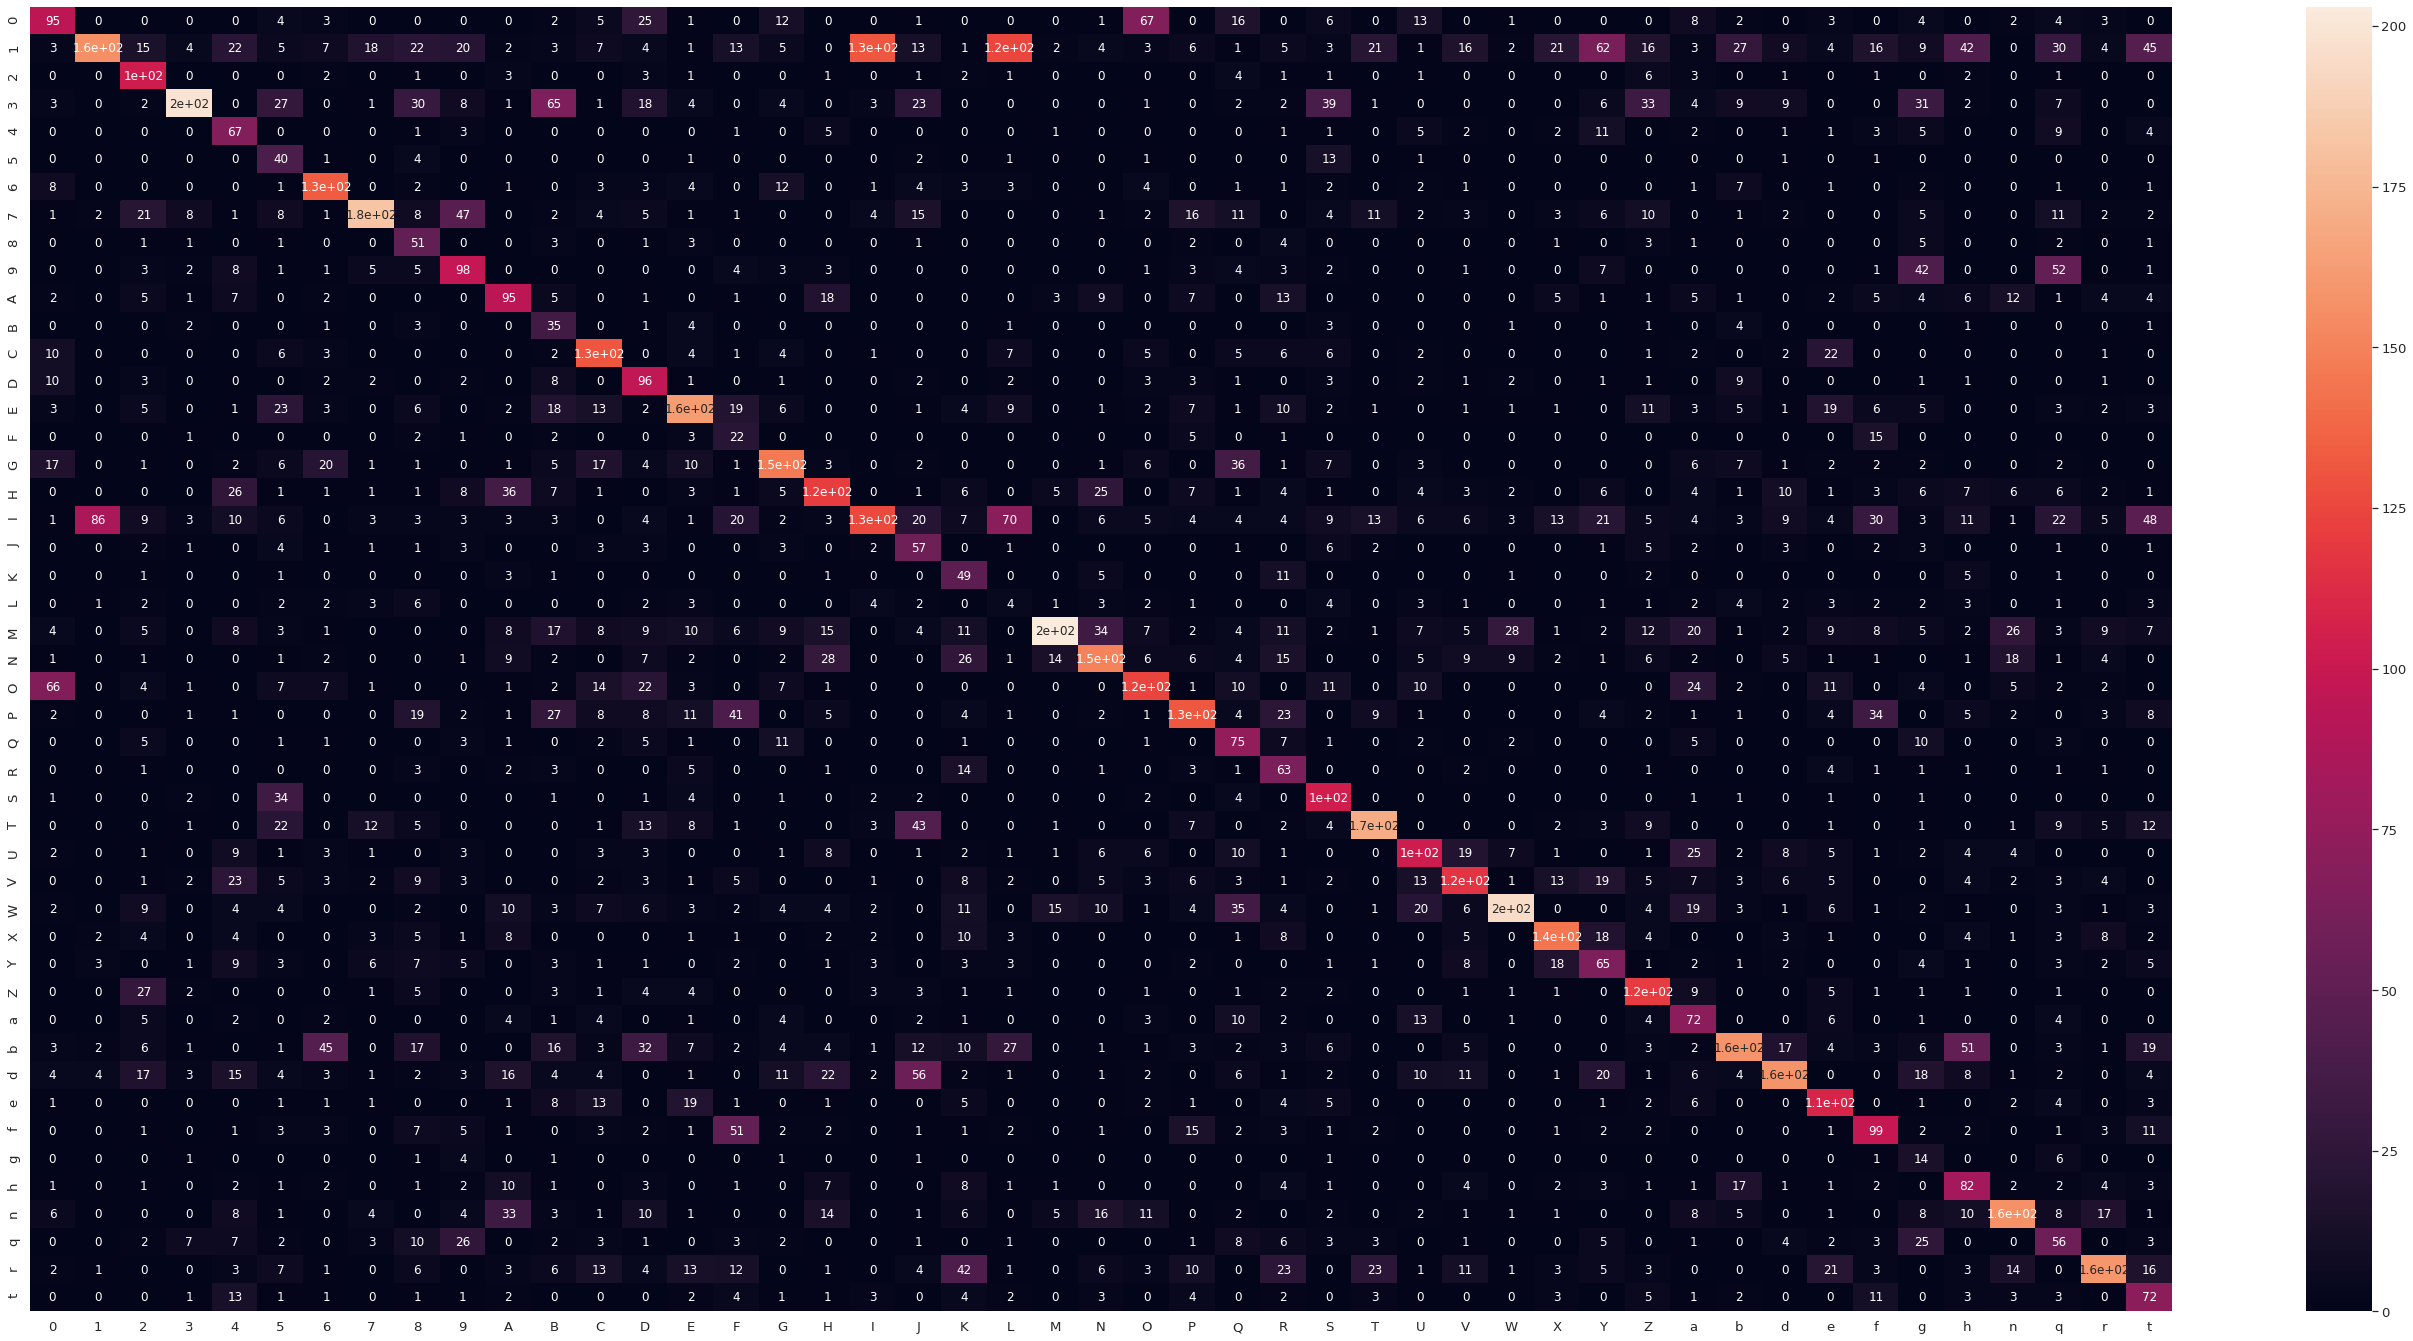

In [14]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

def confusion_matrix(y_pred, y_actual, clsnum):
    
    cm = np.zeros((clsnum,clsnum))
    for i in range(clsnum):
        for j in range(clsnum):
            cm[i,j] = np.count_nonzero(np.logical_and(y_pred == i, y_actual == j))
    return cm.astype("int32")

classes = 47

comparison = np.array(pred_vs_truth)
y_prediction = comparison[:,0]
y_actual = comparison[:,1]

cm = confusion_matrix(y_prediction, y_actual, classes)
cm = pd.DataFrame(cm)#.to_csv("cm.csv")
cm.columns =['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','d','e','f','g','h','n','q','r','t']
cm.index =['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','d','e','f','g','h','n','q','r','t']

plt.figure(figsize=(48,24))
sn.set(font_scale=1.2) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()

